In [56]:
import nilearn as nl # nilearn for loading nifti
from nilearn.image.image import mean_img
from nilearn.plotting import plot_epi, show
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap # custom colormaps
import matplotlib.image as mpimg # load images
from matplotlib.gridspec import GridSpec # image grids (like patchwork)
import numpy as np
import nibabel as nib # nibable: loading nifti
from nilearn import plotting # nilearn plotting

from PIL import Image # image resizing

In [4]:
figpath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/EI_Hurst/Manuscript/images/'

In [5]:
def apply_slice_cut_to_nifti(nii_gz_path, slice_cut):
    """
    Load a NIfTI image, apply a slice cut to extract a subregion, and return a new NIfTI image.

    Parameters:
    - nii_gz_path (str): Path to the input NIfTI (.nii.gz) file.
    - slice_cut (list): Slice cut specification in the form [slice_x, slice_y, slice_z].

    Returns:
    - nibabel.Nifti1Image: New NIfTI image object containing the extracted subregion.
    """
    # Load the NIfTI image
    nii_img = nib.load(nii_gz_path)
    nii_data = nii_img.get_fdata()

    # Extract the subregion using the slice cut
    slice_x, slice_y, slice_z = slice_cut
    subregion_data = nii_data[slice_x, slice_y, slice_z]

    # Create a new NIfTI image with the extracted subregion and original affine matrix
    subregion_img = nib.Nifti1Image(subregion_data, nii_img.affine)

    return subregion_img

In [6]:
basepath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/EI_Hurst/Data_from_BCCHRI/'

/tmp/ipykernel_1578265/4113964360.py:13: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  nii_img = nl.image.crop_img(nii_img)


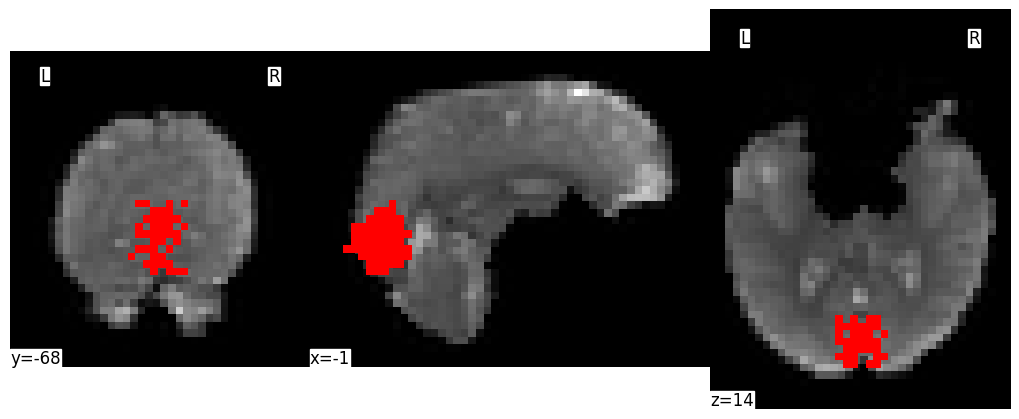

In [58]:
#| label: fig-fmrigreyvoxel
#| fig-cap: >
#|   **A sample fMRI grey-matter mask within the MRS voxel.** Background: a sample coronal, sagittal, 
#|   and axial slice is displayed of the mean fMRI scan from the rest acquisition. Foreground: the greymatter/MRS mask 
#|   used to calculate mean H.

#slice_cut = [slice(-91,60), slice(-60,51), slice(None)]

nii_gz_relpath = 'derivatives/tedana/sub-Pilot10/rest/desc-optcomDenoised_bold.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

nii_img = nib.load(nii_gz_path)
nii_img = nl.image.crop_img(nii_img)

overlay_relpath = 'derivatives/hurst/sub-Pilot10/rest/gm_voxel_mask_space-BOLD_rest.nii.gz'
overlay_path = basepath + overlay_relpath

overlay_img = nib.load(overlay_path)

# Set the number of rows and columns for the subplot grid

fmrimrsgm = plot_epi(mean_img(nii_img, 
    copy_header=True), 
    cbar_tick_format="%i", 
    cmap=plt.cm.gray, 
    black_bg=False, 
    draw_cross=False,
    annotate=True,
    #cut_coords=(-1,-68,14),
    cut_coords=(-1,-68,14),
    #radiological=True,
    figure=plt.figure(figsize=(10,4)))

redcolors = ['red']
custom_cmapred = ListedColormap(redcolors)

fmrimrsgm.add_overlay(overlay_img, cmap=custom_cmapred)

plt.savefig(figpath + "SampleMask.png", dpi=300, bbox_inches="tight")

plt.show()

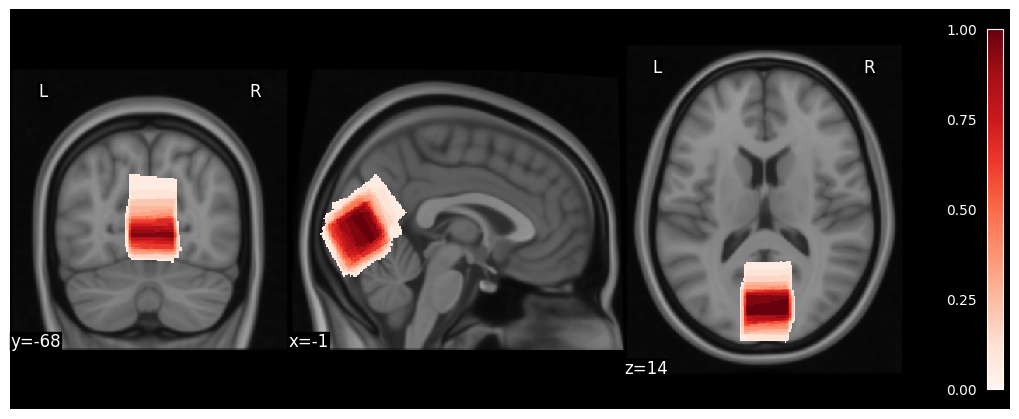

In [59]:
#| label: fig-mrsvoxel
#| fig-cap: >
#|   **Average MRS location.** Overlay in red of the average voxel location across all nineteen participants, 
#|   from 0 (white) to 1 (dark red). MRS voxels were rotated and placed in the occipital lobe. Darker red represents
#|   voxel locations shared by all participants, while white represents voxel locations unique to participants. 
#|   MRS voxels were registered to MNI space and averaged. Underlay is T1w MNI152 at 0.5 mm resolution.

nii_gz_relpath = 'derivatives/VoxelAverage/MNI152_T1_0.5mm.nii.gz'
nii_gz_path = basepath + nii_gz_relpath
nii_img = nib.load(nii_gz_path)

overlay_relpath = 'derivatives/VoxelAverage/Voxels_Average.nii.gz'
overlay_path = basepath + overlay_relpath
overlay_img = nib.load(overlay_path)

averagemrs = plotting.plot_stat_map(
    bg_img = nii_img,
    stat_map_img = overlay_img,
    vmin=0.00, vmax=1, 
    colorbar= True,                           
    cbar_tick_format="%.2f",
    cmap = "Reds",
    black_bg=True, 
    draw_cross=False,
    annotate=True,
    cut_coords=(-1,-68,14),
    figure=plt.figure(figsize=(10,4)))

plt.savefig(figpath + "MRSVoxelAverage.png", dpi=300, bbox_inches="tight")

plt.show()